<a href="https://colab.research.google.com/github/keerthana01994831/cs480student/blob/main/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

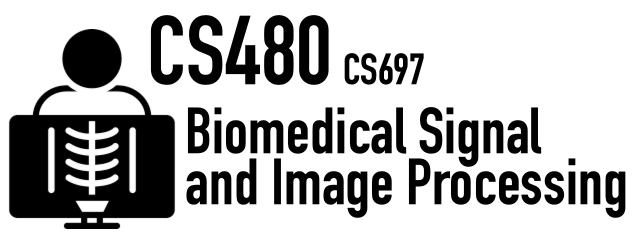
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset
from matplotlib import pyplot as plt


In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

In [ ]:
arraay1 = [[-0.245 ,1, 2], -0.125]
ecg [0:13:2]

array([-0.245, -0.185, -0.17 , -0.185, -0.16 , -0.17 , -0.22 ])

In [ ]:
firstsecond = ecg[:SAMPLING_RATE]

In [ ]:
secondsecond = ecg[1*SAMPLING_RATE:2*SAMPLING_RATE]

In [ ]:
ele = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

[-0.245 -0.215 -0.185 ... -0.405 -0.395 -0.385]


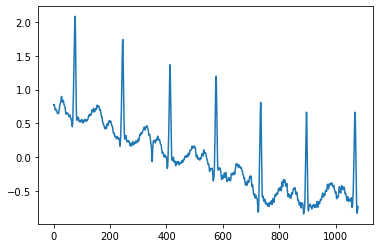

In [ ]:
print (ecg)
plot (ele)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


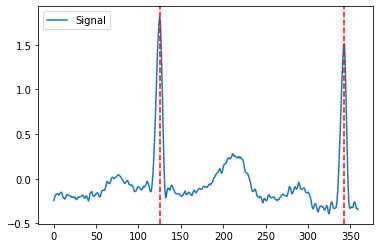

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

Text(0, 0.5, 'value')

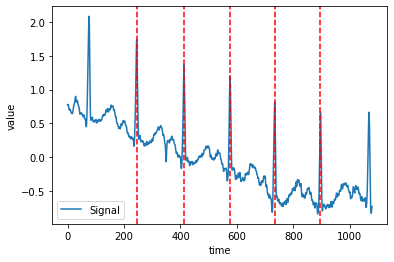

In [ ]:
_, rpeak1 = nk.ecg_peaks(ele, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeak1['ECG_R_Peaks'], ele)
plt.xlabel("time")
plt.ylabel("value")


**Task 3:** Detect Heartrate. [15 Points]

# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [ ]:
pip install heartpy


bpm : 103.06551628394845
ibi : 582.1539750957854
sdnn : 76.1498523954714
sdsd : 77.52620235069179
rmssd : 102.8033411674991
pnn20 : 0.6446469248291572
pnn50 : 0.4145785876993166
hr_mad : 33.33333333333337
sd1 : 72.68651515197051
sd2 : 76.06672021612641
s : 17369.943729481718
sd1/sd2 : 0.9555626290373528
breathingrate : 0.16666666666666666


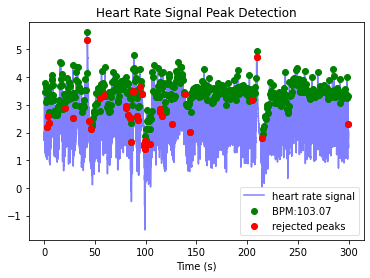

In [ ]:
import heartpy as heart
BPM, data = heart.process(ecg, SAMPLING_RATE)
for item in data:
  print (item,":", data [item])
heart.plotter(BPM,data)

The general hear beat of a person is 72. Here we have 103 which is higher.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ecg_signal = ecg
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=12000)


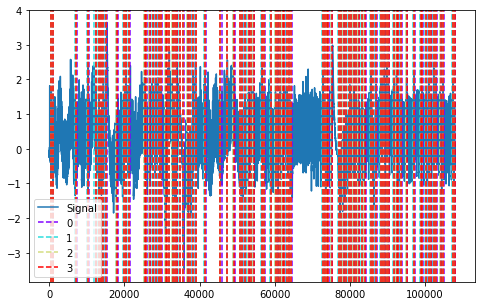

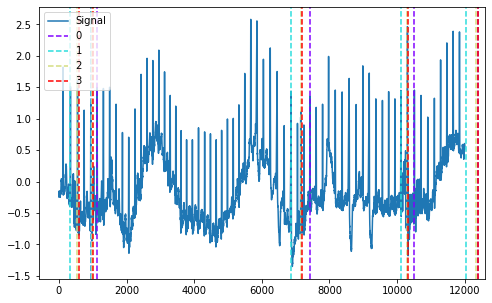

In [ ]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg_signal)
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg_signal[:12000])


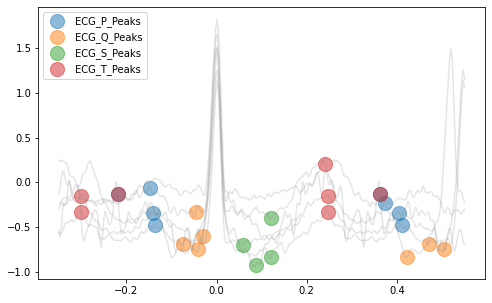

In [ ]:
_, waves_peak = nk.ecg_delineate(ecg[:1200], sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [ ]:
# TODO Does the detection work well?


Yes, the detection work well.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

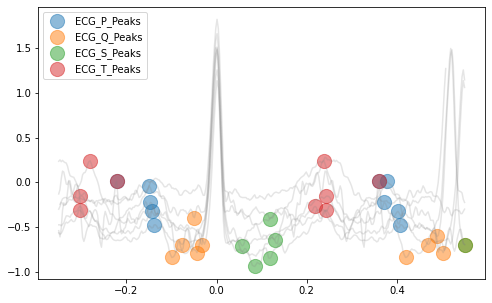

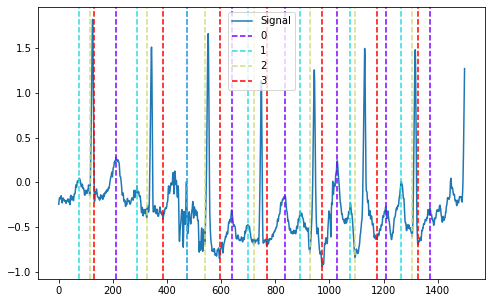

In [ ]:
_, alpha = nk.ecg_peaks(ecg[:1500], sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg[:1500], alpha, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg[:1500])

In [ ]:
ecg_filtered = nk.signal_filter(ecg,sampling_rate=SAMPLING_RATE, lowcut=10 , highcut=100, method="butterworth", order=2, window_size='default', powerline=50 )

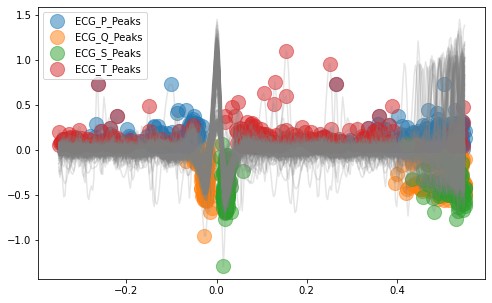

In [ ]:
_, beta = nk.ecg_peaks(ecg_filtered, sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg_filtered, beta, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

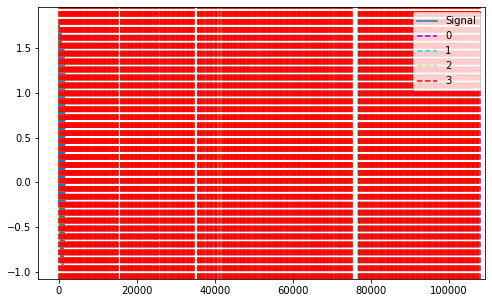

In [ ]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], ecg[:1500] )

In [ ]:
# TODO Does the filtering improve the result?

Low-band and High band filters are useful and yes, they improved results.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#

In [ ]:
References:
GeekforGeeks
https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html

Collobaration: 
Kiran Sandilya

